In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import mixture


data = pd.read_csv('heart.csv')
plt.rcParams.update({'font.size': 19})
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [18]:
#cleaning from NA
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


df = data

y =np.array(df['target'])
X = np.array(df.loc[:, df.columns != 'target'])


In [19]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

x=X[:,4]

###  RBF kernel

In [20]:

x_grid = np.linspace(100, x.max(), 1000)
param = np.linspace(0.11,1,10)

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 40, 1000)},
                    cv=20) # 20-fold cross-validation

grid.fit(x[:, None])
print(grid.best_params_)
print(grid.score(x[:, None]))
print(grid.score(x_grid[:, np.newaxis]))


{'bandwidth': 29.495795795795797}
-1612.99244822
-7617.31291907


In [21]:
b = grid.best_params_
u=b['bandwidth']
print(u)

29.4957957958


-7617.31291907


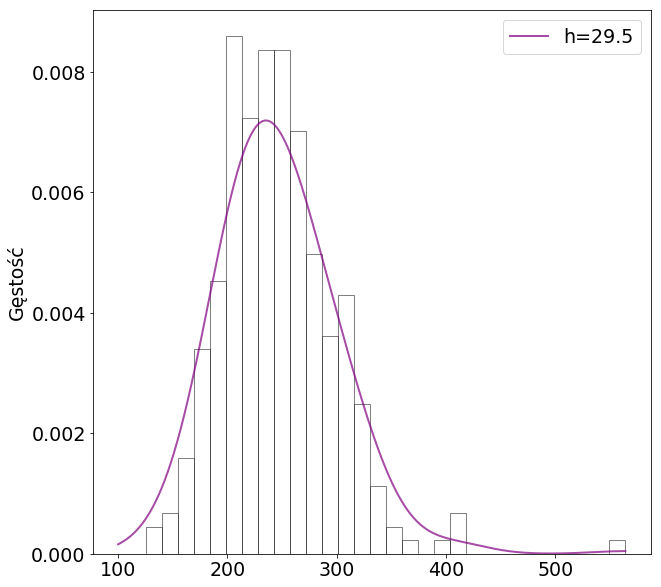

In [22]:
num_bins = 30
exp = []
# the histogram of the data

h=plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='white', alpha=0.5,edgecolor='black')
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'b--')

kde_skl = KernelDensity(bandwidth=u)
kde_skl.fit(x[:, np.newaxis])
# score_samples() returns the log-likelihood of the samples
print(kde_skl.score(x_grid[:, np.newaxis]))
log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
exp =  np.exp(log_pdf)
#print(exp)

plt.plot(x_grid, exp,"purple",label='h={0}'.format(round(u,2)), linewidth=2, alpha=0.7)
plt.legend(loc='upper right')    
plt.ylabel('Gęstość')
plt.show()
h.savefig('chol_1.png')   # save the figure to file
plt.close(h) 


In [23]:
import scipy

scipy.stats.shapiro(exp)

(0.7919586896896362, 6.987662342793258e-34)

### Linear kernel

In [24]:

x_grid = np.linspace(100, x.max(), 1000)
param = np.linspace(0.11,1,10)

grid = GridSearchCV(KernelDensity(kernel='linear'),
                    {'bandwidth': np.linspace(0.1,40, 1000)},
                    cv=20) # 20-fold cross-validation

grid.fit(x[:, None])
print(grid.best_params_)
print(grid.score(x[:, None]))
print(grid.score(x_grid[:, np.newaxis]))



{'bandwidth': 0.10000000000000001}
-781.635706641
-inf


In [25]:
b = grid.best_params_
u=b['bandwidth']
print(u)


0.1


-1599.53632452


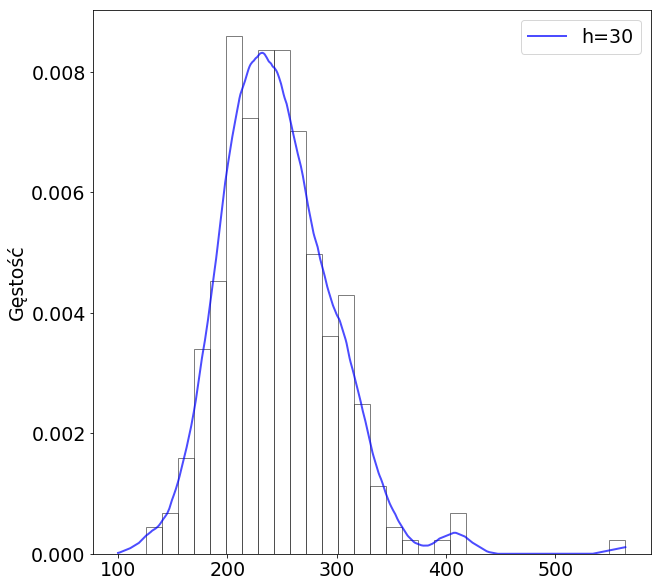

In [26]:
num_bins = 30
# the histogram of the data
h=plt.figure(figsize=(10,10))
exp=[]
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='white', alpha=0.5,edgecolor='black')
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'b--')
u=30

kde_skl = KernelDensity(kernel='linear',bandwidth=30)
kde_skl.fit(x[:, np.newaxis])
print(kde_skl.score(x[:, np.newaxis]))
# score_samples() returns the log-likelihood of the samples

log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
exp =  np.exp(log_pdf)
#print(exp)

plt.plot(x_grid, exp,"blue",label='h={0}'.format(round(u,2)), linewidth=2, alpha=0.7)
plt.legend(loc='upper right')    
plt.ylabel('Gęstość')
plt.show()
h.savefig('chol_2.png')   # save the figure to file
plt.close(h) 

In [27]:
import scipy

scipy.stats.shapiro(exp)

(0.7510074377059937, 2.8308627105501212e-36)

In [10]:

x_grid = np.linspace(x.min()-10, x.max(), 1000)
param = np.linspace(0.11,1,10)

grid = GridSearchCV(mixture.GaussianMixture(n_components=2, covariance_type='full',random_state=2),
                    {'n_components': [1,2,3,4,5,6,7,8,9]},
                    cv=20) # 20-fold cross-validation

grid.fit(x[:, None])
print(grid.best_params_)
print(grid.score(x[:, None]))
print(grid.score(x_grid[:, np.newaxis]))


{'n_components': 2}
-5.32744348572
-8.39784433315


In [11]:
b = grid.best_params_
u=b['n_components']
print(u)


2


-8.39784433315


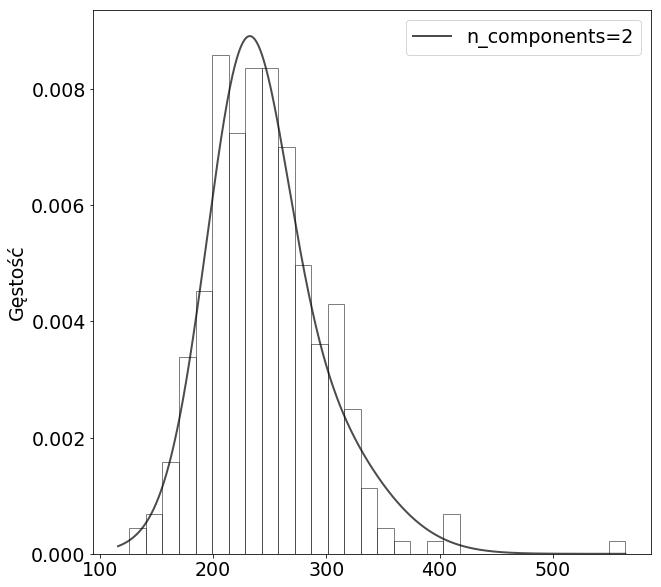

In [12]:
num_bins = 30
# the histogram of the data
exp=[]
h=plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='white', alpha=0.5,edgecolor='black')
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'b--')

kde_skl = mixture.GaussianMixture(n_components=u,random_state =2)
kde_skl.fit(x[:, np.newaxis])
# score_samples() returns the log-likelihood of the samples
print(kde_skl.score(x_grid[:, np.newaxis]))
log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
exp =  np.exp(log_pdf)


plt.plot(x_grid, exp,"black",label='n_components={0}'.format(u), linewidth=2, alpha=0.7)
plt.legend(loc='upper right')    
plt.ylabel('Gęstość')
plt.show()
h.savefig('chol_3.png')   # save the figure to file
plt.close(h) 

In [13]:
sum(kde_skl.score_samples(x[:, np.newaxis]))

-1614.2153761739121